<a href="https://colab.research.google.com/github/nematatu/Colab-Python/blob/master/%E5%9F%BA%E6%9C%AC%E7%9A%84%E3%81%AA%E7%94%BB%E5%83%8F%E5%88%86%E9%A1%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
pip install tensorflow

  Using cached keras-2.14.0-py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 3.0.0
    Uninstalling keras-3.0.0:
      Successfully uninstalled keras-3.0.0


In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [15]:
print(tf.__version__)

2.14.0


In [16]:
#pip install --upgrade keras

In [17]:
#mnist(エムにスト)=Modified National Institute Standard and Technology database
fashion_mnist=tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [18]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [19]:
#.shapeはnumpy形式のデータに対して使える
#データセットの形式を表示できる
#60000個のデータが存在し、画像サイズは28x28
train_images.shape

(60000, 28, 28)

In [20]:
#ラベル数も当然60000
len(train_labels)

60000

In [21]:
#それぞれラベルは0-9の整数
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [22]:
#テストデータも同様
print(test_images.shape)
len(test_labels)

(10000, 28, 28)


10000

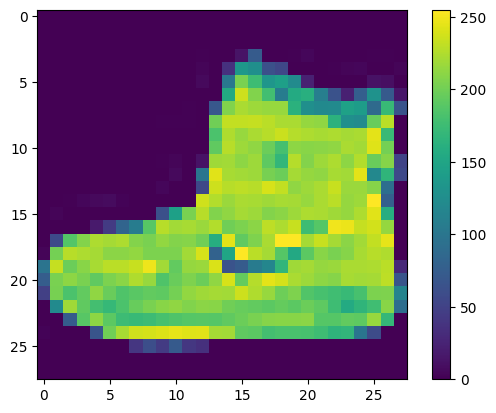

In [23]:
#データの前処理
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [24]:
#以下のようにすることで、上の画像のピクセルの最大値が出てくる。
#つまり、ピクセルの幅がわかる。
print(train_images[0].max())

255


In [25]:
#0-255のピクセルの範囲の画像を0-1にスケーリングする
train_images=train_images/255.0
test_images=test_images/255.0

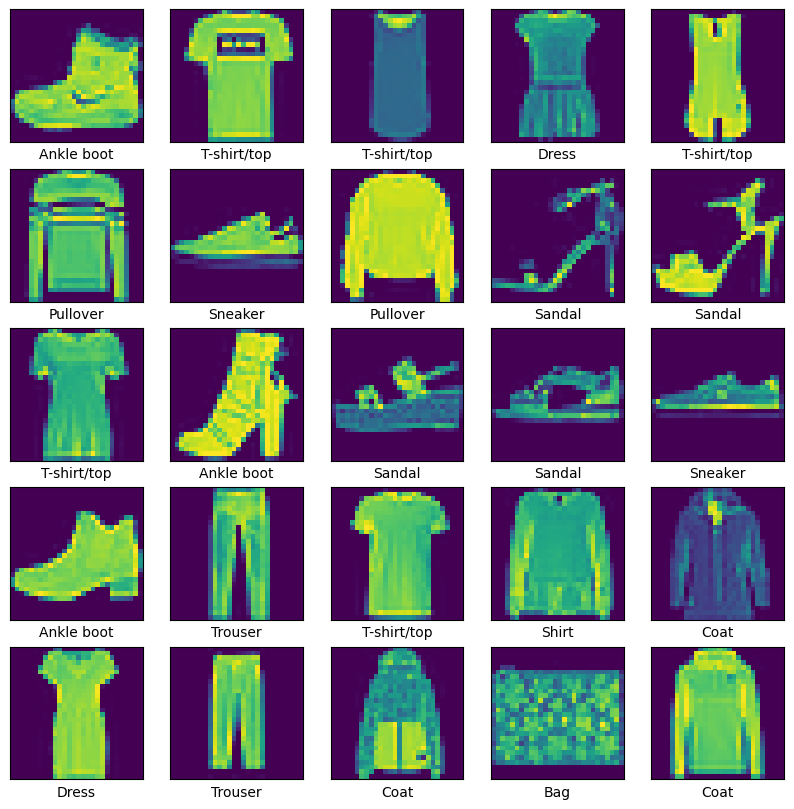

In [26]:
#train_dataを表示してみる
plt.figure(figsize=(10,10))
for i in range(25):
  #5x5の枠を作って、そのうちi+1個目になんかするよ
  plt.subplot(5,5,i+1)
  #x軸とy軸の目盛りを消す
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  #plt.cm.binaryで、cmp(カラーマップ)を指定
  #グレースケールのカラーマップで、0が黒、1が白
  #viridisは青が低く、黄色が高い値を示す
  plt.imshow(train_images[i],cmap=plt.cm.viridis)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [27]:
#レイヤー作るで〜！
#tf.keras.Sequentialでモデルのレイヤーを定義
model=tf.keras.Sequential([
    #Flattenで、n次元配列を一次元にデータのフォーマットをする
    #具体的には、(28,28)の二次元で格納されていたデータを、28x28=784の一次元の配列にフォーマットする
    #機械学習においては一般的だそうで、シンプルにデータを扱えるのが利点とのこと
    tf.keras.layers.Flatten(input_shape=(28,28)),
    #↑が入力層に対し、↓のDenseが中間層としての役割を持つ
    #128個のノードを持ってて、活性化関数にreluを使う
    #relu: 0以下なら0を、0以上ならその値を返す関数
    #要は、マイナスは切り捨てるで〜ってやつ
    tf.keras.layers.Dense(128,activation="relu"),
    #Denseが出力層としての役割になってる
    #10個の配列を返すよ
    tf.keras.layers.Dense(10)
])

In [28]:
#モデルのコンパイル(学習過程の設定)をするぞ〜！
model.compile(
    #オプティマイザー: モデルのパラメータを最適な状態に更新するための手法
    #具体的には、adamの場合、最初は学習率が高くてどんどん学習していくけど、
    #次第に学習率が落ちて、適度に調整しながら、小さい学習率で進んでいく
    #x:optimazer o:optimizer
    optimizer='adam',
    #損失関数: モデルの予測が正解とどれだけ離れているかを測定
    #from_logits=Trueとすることで、ロジット（ソフトマックス関数を適応する前の出力。今回だと、上のセルの出力そのまま）に損失関数を適応
    #また、損失関数内部でソフトマックス関数を行う
    #tf.keras.lossesをつける
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    #指標を示している
    #accuracyで、精度を指標に頑張ってもらう
    metrics=['accuracy']
)

In [29]:
#train_imagesを使ってモデルをトレーニングするぞ〜！
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4984 - accuracy: 0.8239
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3740 - accuracy: 0.8653
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3336 - accuracy: 0.8779
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3103 - accuracy: 0.8870
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2941 - accuracy: 0.8918
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2798 - accuracy: 0.8979
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2679 - accuracy: 0.9010
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2560 - accuracy: 0.9045
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2474 - accuracy: 0.9074
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0

In [30]:
#model.evaluate()でモデルの性能の指標を得られる
#accuracyがこのとき低くなっているのは、過学習によるものらしい
#詳しくはわからん
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=1)
print('\nTest Accuracy',test_acc)
print('\nTest Loss',test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.3289 - accuracy: 0.8848

Test Accuracy 0.8848000168800354

Test Loss 0.328930526971817


In [31]:
#元のmodelを土台に、Softmax関数を追加してる
#Softmax関数: よくわからんけど合計が1になるような確率分布に変換してるらしい
probability_model=tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [32]:
#学習したモデルを使ってtest_imagesを予測する
#予測っていい方がわかりにくい
#普通に学習したものを使って当ててるだけ
predictions=probability_model.predict(test_images,verbose=1)


313/313 [==============================] - 1s 2ms/step


In [33]:
#一個一個みていこうぜ
#確信度を表してる
predictions[0]

array([2.5102176e-09, 1.3023427e-10, 4.9694320e-12, 2.2497222e-14,
       4.4483870e-09, 3.0255495e-04, 1.7338566e-08, 1.2124911e-03,
       2.3854127e-10, 9.9848485e-01], dtype=float32)

In [34]:
#最も確信度が高いラベルは？
np.argmax(predictions[0])

9

In [39]:
#グラフ化しようぜ
def plot_image(i,predictions_array,true_label,img):
  true_label,img=true_label[i],img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  #plt.imshow()で画像を表示
  #cmap=plt.cm.binaryで、カラーマップを白黒にしてる
  plt.imshow(img,cmap=plt.cm.binary)

  #最も確信度が高いラベルを代入
  predicted_label=np.argmax(predictions_array)
  if predicted_label==true_label:
    color='blue'
  else:
    color='red'

  plt.xlabel("{}{:2.0f}% ({})".format(class_names[predicted_label],100*np.max(predictions_array),class_names[true_label]),color=color)

def plot_value_array(i,predictions_array,true_label):
    true_label=true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot=plt.bar(range(10),predictions_array,color='#777777')
    plt.ylim([0,1])
    predicted_label=np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


In [43]:
for label in test_labels:
  print(label)

ストリーミング出力は最後の 5000 行に切り捨てられました。
2
3
6
4
6
3
6
9
4
9
0
8
3
5
6
2
0
1
3
9
4
2
5
0
5
3
2
5
0
0
0
0
0
9
1
3
4
3
5
5
6
6
1
4
9
7
4
4
7
5
7
1
6
8
7
9
5
7
0
2
9
2
5
0
7
6
4
5
2
9
4
3
2
5
9
2
5
9
7
3
8
3
5
6
5
3
0
7
6
9
5
1
3
6
9
3
6
2
5
3
4
9
9
1
2
2
2
4
6
8
7
9
9
4
8
8
9
0
7
0
4
3
8
6
4
2
0
1
4
0
2
1
5
4
6
6
0
3
4
5
6
8
7
6
0
3
1
8
8
8
9
9
5
5
8
6
5
4
4
2
5
6
9
2
9
1
0
4
6
6
9
8
0
4
9
1
9
4
7
3
5
4
3
4
6
1
6
2
4
3
7
8
4
5
5
9
0
6
3
4
5
5
5
7
3
1
3
3
7
0
7
7
6
8
3
5
5
8
1
9
4
0
4
2
1
6
0
1
6
5
0
8
1
1
7
5
2
5
9
0
8
3
4
4
2
7
0
7
6
6
2
3
7
1
6
4
3
3
0
0
6
4
8
7
0
3
6
4
7
3
3
6
0
2
4
4
1
8
1
9
1
2
6
4
2
5
3
3
5
3
5
8
3
9
7
3
0
0
1
0
1
0
7
7
4
8
9
0
1
5
4
9
4
7
9
9
7
0
1
0
9
9
5
1
7
2
9
1
5
6
8
1
7
3
0
8
4
7
0
8
9
8
8
4
5
6
4
5
9
0
0
5
3
7
7
4
4
7
4
5
8
3
7
2
7
3
8
8
8
7
8
6
0
5
7
9
8
5
6
0
6
4
4
2
8
9
9
1
9
5
8
4
4
8
4
8
7
4
8
3
0
7
8
8
3
9
9
5
9
2
6
9
7
5
7
4
9
9
2
3
9
5
3
5
6
1
2
9
1
4
8
5
1
7
9
0
3
3
6
9
0
4
6
0
0
2
9
7
1
9
8
5
6
8
5
9
5
2
4
2
5
2
2
5
4
2
7
1
2
6
8
2
5
6
2
6
9
5
5
1
5
2
4
4


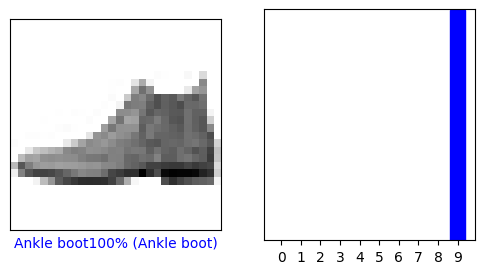

In [40]:
i=0
#figsize=(x,y)で横x、縦yの大きさの図を作る
plt.figure(figsize=(6,3))
#1行2列の配置を作って、その1番目になんかするよ
plt.subplot(1,2,1)
#predictions[i]: 予想したいもの
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

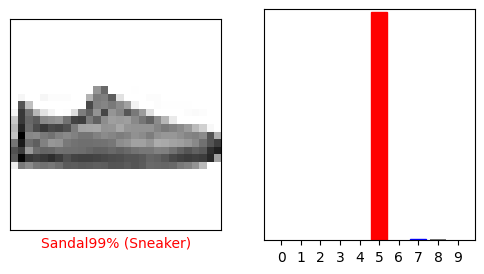

In [41]:
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()